g:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0324
Epoch 2/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0058
Epoch 3/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0050
Epoch 4/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0045
Epoch 5/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0042
Epoch 6/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0041
Epoch 7/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0040
Epoch 8/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0038
Epoch 9/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0037
Epoch 10/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0037
Epoch 11/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0036
Epoch 12/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0036
Epoch 13/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0036
Epoch 14/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0036
Epoch 15/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

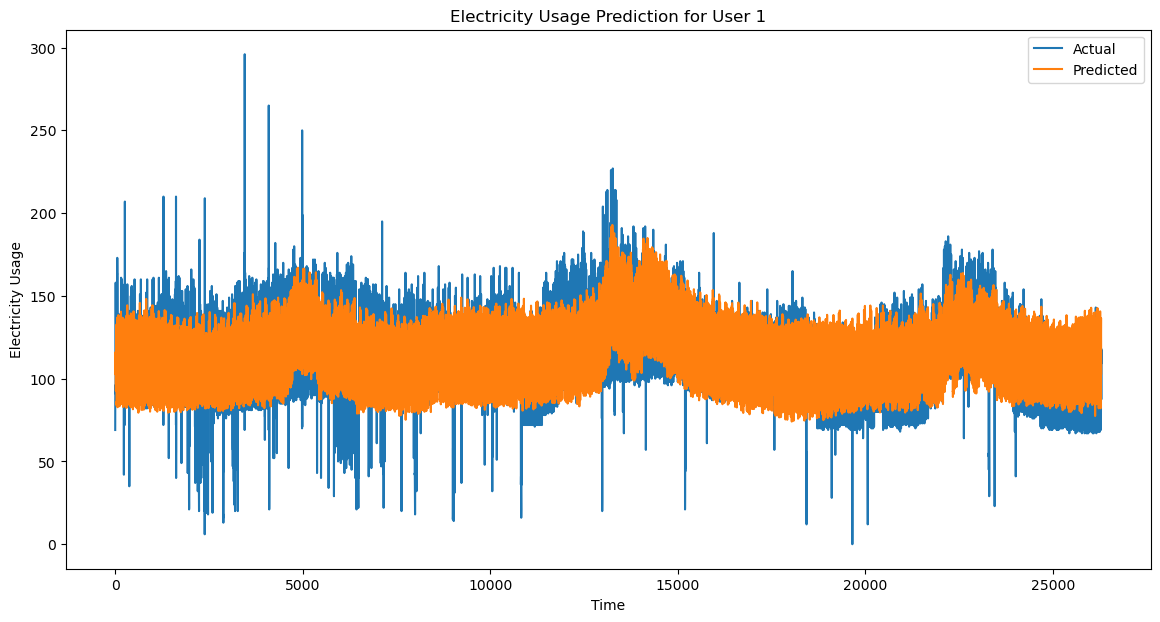

CNN运行时间为: 70.95747709274292 秒


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
import time

# 记录程序开始时间
start_time = time.time()

# 加载数据集
data = pd.read_csv('electricity.csv')

# 数据预处理
# 提取用户用电量数据（假设从第3列到最后一列为用户用电量数据）
values = data.iloc[:, 2:].values

# 归一化数据
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(values)

# 创建时间序列数据集
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), :]
        X.append(a)
        Y.append(data[i + time_step, :])
    return np.array(X), np.array(Y)

time_step = 10
X, Y = create_dataset(scaled_values, time_step)

# 调整输入数据形状以适应Conv1D
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

# 创建CNN模型
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_step, X.shape[2])))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(X.shape[2]))

model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(X, Y, epochs=50, batch_size=32, verbose=1)

# 进行预测
predictions = model.predict(X)

# 反归一化预测结果
predictions = scaler.inverse_transform(predictions)

print(predictions)

# 记录程序结束时间并计算运行时间
end_time = time.time()
execution_time = end_time - start_time
print(f"CNN运行时间为: {execution_time} 秒")
